In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

In [2]:
loan = pd.read_csv("loan_data_set.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [5]:
loan["Dependent"] = loan["Dependents"].replace("3+","3")

#df['column name'] = df['column name'].replace(['old value'],'new value')

#loan["Dependents"] = loan["Dependents"].apply(lambda x:str(x.replace("+","")))

In [6]:
loan["Dependent"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [7]:
loan["Dependent"] = loan["Dependent"].astype(float)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Dependent          599 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [9]:
loan = loan.drop(columns = ["Loan_ID", "Dependents"])
loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Dependent          599 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [11]:
print(loan.isna().sum())
print("Length of DataSet : ", len(loan))

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Dependent            15
dtype: int64
Length of DataSet :  614


In [12]:
loan = loan.dropna() 
print("Length of DataSet : ", len(loan))

Length of DataSet :  480


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder() 

loan[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]] = loan[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].apply(le.fit_transform)

loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0.0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1,2.0


In [15]:
x = loan.drop(columns = ["Loan_Status"])

y = loan["Loan_Status"]

In [16]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Bagging Meta Estimator Classifier

In [18]:
from sklearn.ensemble import BaggingClassifier 

model = BaggingClassifier(n_estimators = 100)

model.fit(x_train, y_train)

BaggingClassifier(n_estimators=100)

In [19]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.75


[[16 19]
 [ 5 56]]


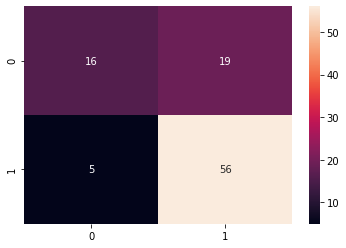

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm) 

sns.heatmap(cm, annot = True)
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.75      0.92      0.82        61

    accuracy                           0.75        96
   macro avg       0.75      0.69      0.70        96
weighted avg       0.75      0.75      0.73        96



### Parameter Tunning For Bagging Meta Estimator

In [24]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn

In [25]:
max_features=[1,10,50,100]

n_estimators=[5,10,100,1000]

grid={"max_features":max_features,"n_estimators":n_estimators}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator= BaggingClassifier(), param_grid=grid, cv=cv, scoring="accuracy")

In [26]:
res=grid_cv.fit(x_train,y_train)
print(res.best_params_)
print(res.best_score_)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(

{'max_features': 10, 'n_estimators': 100}
0.8109086819613135


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.75


[[14 21]
 [ 3 58]]


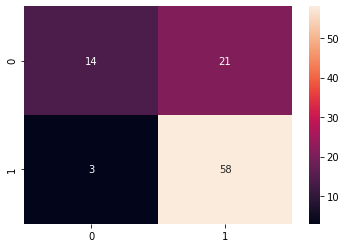

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot = True)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.40      0.54        35
           1       0.73      0.95      0.83        61

    accuracy                           0.75        96
   macro avg       0.78      0.68      0.68        96
weighted avg       0.77      0.75      0.72        96



### Parameter Tunning For Random Forest

In [33]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [34]:
max_features=["sqrt","log2"]

n_estimators=[5,10,100,1000]

grid={"max_features":max_features,"n_estimators":n_estimators}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=cv, scoring="accuracy")

In [35]:
res=grid_cv.fit(x_train,y_train)
print(res.best_params_)
print(res.best_score_)

{'max_features': 'sqrt', 'n_estimators': 1000}
0.8188933873144401
